In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

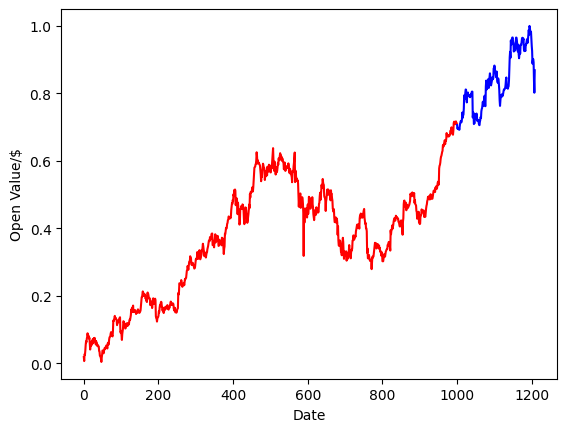

In [3]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208
#nil pata eke x value tikath api dagnnwa. lassnt ekama line eke plot krla pennanna.

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:]))) #lstm layers and input shape eka 50,1 window ekak.

model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
#96n ena output yata eke 50kt denkota mula 46a neglet krla last 50 denwa.
model.add(LSTM(units=50,return_sequences=False))
#return sequence false kynne apit antimt oni eka output ekak withrai.
model.add(Dropout(0.2))
#regression nisa linera demma.
model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [5]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/200
29/29 [==============================] - 13s 197ms/step - loss: 0.0176 - val_loss: 0.0023
Epoch 2/200
29/29 [==============================] - 2s 76ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 3/200
29/29 [==============================] - 3s 99ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 4/200
29/29 [==============================] - 2s 82ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 5/200
29/29 [==============================] - 2s 65ms/step - loss: 0.0026 - val_loss: 9.0904e-04
Epoch 6/200
29/29 [==============================] - 2s 67ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 7/200
29/29 [==============================] - 2s 68ms/step - loss: 0.0024 - val_loss: 9.2331e-04
Epoch 8/200
29/29 [==============================] - 2s 67ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/200
29/29 [==============================] - 2s 67ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 10/200
29/29 [==============================] - 2s 67ms/step - loss: 0.0024 - val_lo

29/29 [==============================] - 2s 66ms/step - loss: 7.1918e-04 - val_loss: 9.8683e-04
Epoch 81/200
29/29 [==============================] - 2s 67ms/step - loss: 9.0627e-04 - val_loss: 4.5030e-04
Epoch 82/200
29/29 [==============================] - 2s 65ms/step - loss: 7.7563e-04 - val_loss: 2.6356e-04
Epoch 83/200
29/29 [==============================] - 2s 66ms/step - loss: 7.9117e-04 - val_loss: 3.8757e-04
Epoch 84/200
29/29 [==============================] - 2s 64ms/step - loss: 6.9636e-04 - val_loss: 8.0076e-04
Epoch 85/200
29/29 [==============================] - 2s 65ms/step - loss: 7.4518e-04 - val_loss: 2.7971e-04
Epoch 86/200
29/29 [==============================] - 2s 64ms/step - loss: 8.0761e-04 - val_loss: 1.4171e-04
Epoch 87/200
29/29 [==============================] - 2s 63ms/step - loss: 7.9966e-04 - val_loss: 2.5267e-04
Epoch 88/200
29/29 [==============================] - 2s 67ms/step - loss: 7.5747e-04 - val_loss: 4.3094e-04
Epoch 89/200
29/29 [============

Epoch 155/200
29/29 [==============================] - 2s 66ms/step - loss: 4.7486e-04 - val_loss: 1.1339e-04
Epoch 156/200
29/29 [==============================] - 2s 68ms/step - loss: 5.5939e-04 - val_loss: 1.5786e-04
Epoch 157/200
29/29 [==============================] - 2s 69ms/step - loss: 5.1519e-04 - val_loss: 1.6168e-04
Epoch 158/200
29/29 [==============================] - 2s 75ms/step - loss: 5.4147e-04 - val_loss: 4.9953e-04
Epoch 159/200
29/29 [==============================] - 2s 77ms/step - loss: 7.4353e-04 - val_loss: 3.8392e-04
Epoch 160/200
29/29 [==============================] - 2s 78ms/step - loss: 4.8981e-04 - val_loss: 9.1360e-05
Epoch 161/200
29/29 [==============================] - 2s 70ms/step - loss: 5.7390e-04 - val_loss: 3.1836e-04
Epoch 162/200
29/29 [==============================] - 2s 74ms/step - loss: 4.8023e-04 - val_loss: 1.6100e-04
Epoch 163/200
29/29 [==============================] - 2s 74ms/step - loss: 4.7593e-04 - val_loss: 9.4000e-05
Epoch 164/

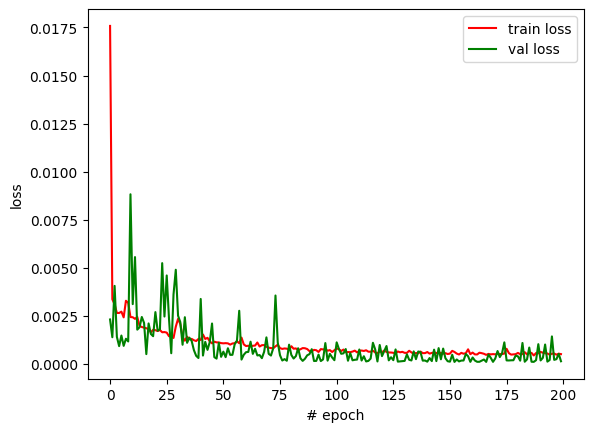

In [6]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result+0.01)
print('r2 score:',r2)

7/7 [==============================] - 0s 20ms/step
r2 score: 0.955775834857975


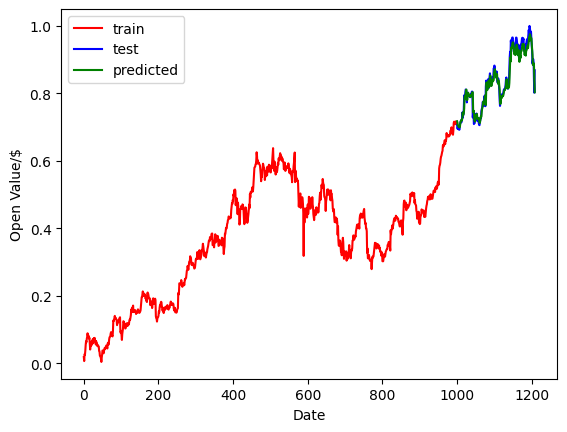

In [8]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

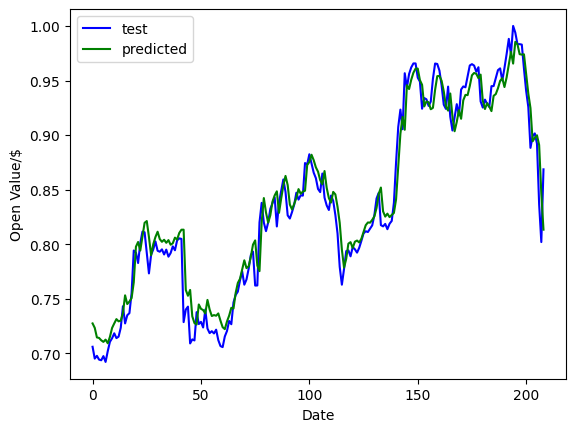

In [18]:
plt.plot(test_target,'b',label='test')
plt.plot(result+0.01,'g',label='predicted')
#actual target and predicted target athra graph eka godak samanai.
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [14]:
model.save('sotock_market.h5')

C:\Users\User\anaconda3\envs\nlp\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
